In [2]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

# PRACTICEs

## 1.1. Keys and superkeys

#### 1.1. The current database model


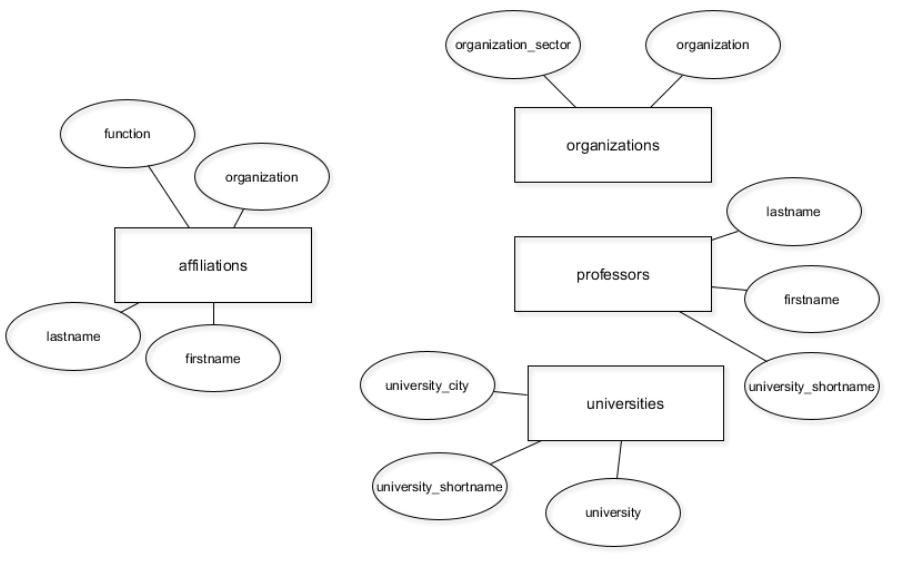

In [5]:
### Look back the following picture

Then compare with the ...
#### 1.2. The database model with primary_keys

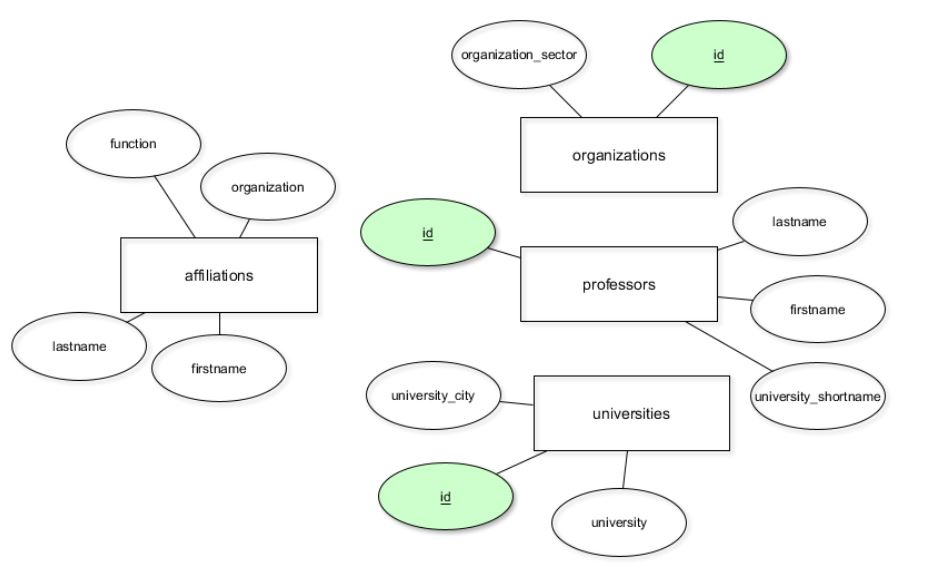

In [6]:
### Look back the following picture

**WHAT IS A KEY?**

> It attributes that **identify a record uniquely**
>
> **As long as** attributes can be **removed : `superkey`**
> 
> If **no more** attributes can be **removed**: **`minimal superkey or key`**!

================================================================================================
|**Example.** Loot at this table! 
-----------------------------------------------------------

|   liscence_no     | serial_no   | make      |  model   | year   |
|-------------------|-------------|-----------|----------|--------|
| Texas ABC-739     |  A69352     |  Ford     |  Mustang | 2      |
| Florida TVP-347   |  B4369      | Oldsmobile| Cutclass | 5      |
| NewYork MPO-32    |  X83554     | Oldsmobil | Delta    | 1      |
| California 432-TFY|  C43742     | Mercedes  | 190-D    | 99     |
| California RSK-629|  Y82935     | Toyota    | Camry    | 4      |
| Texas RSK-629     |  U028635    | Jaguar    | XJS      | 4      |

-------------------------------------------------------------------------------------------
|Notes : Adapted from Elmasri, Navathe (2011): Fundamentals of Database Systems, 6th, Ed. Pearson.
-------------------------------------------------------------------------------------------
| SK1 = {lisence_no, serial_no, make, model, year}      [S.K. = super key ]
---------------------------------------------------------------------------------
| SK2 = {lisence_no, serial_no, make, model}
--------------------------------------------------
|  SK3 = {lisence_no, serial_no, make}, SK4 = {lisence_no, serial_no}, ...
-------------------------------------------------------------------------------------------



| COMMENTS | K = key \\\ K1 = {lisence_no}, K2 = {serial_no}, K3 = {make}, K4 = {model, year}   |
|----------|-------------------------------------------------------------------------------|
|          | `K1` and `K3` : only consist of one attribute                                 |
|          | Removing either `"make"` or `"year"` from `K4` would result duplicates        |
|          | Only one candidate key can be the **chosen key**                              |


### EXERCISEs
#### Exercise 1.1. Get to know SELECT COUNT DISTINCT
Your database doesn't have any defined `keys` so far, and you don't know which columns or combinations of columns are suited as `keys`.

There's a simple way of finding out whether a certain column (or a `combination`) contains only `unique values` – and thus identifies the records in the table.

You already know the **`SELECT DISTINCT`** `query` from the first chapter. Now you just have to wrap everything within the **`COUNT()`** function and `PostgreSQL` will return the number of unique rows for the given columns:

                    SELECT COUNT(DISTINCT(column_a, column_b, ...))
                    FROM table;
#### Instructions
**Step 1.** First, find out the number of rows in `universities`.

**SOLUTION.**

                    SELECT COUNT(*)
                    FROM universities;
**query result**

| count |
|-------|
| 11|


**Step 2.** Then, find out how many unique values there are in the `university_city` column.
**SOLUTION.**

                    -- Count the number of distinct values in the university_city column
                    SELECT COUNT(DISTINCT(university_city)) 
                    FROM universities;
**query result**

| count |
|-------|
|  9 |

So, obviously, the `university_city` column wouldn't lend itself as a `key`. Why? Because there are only `9 distinct values`, but the table has 11 rows.

#### Exercise 1.2. Identify keys with SELECT COUNT DISTINCT
There's a very basic way of finding out what qualifies for a key in an existing, populated table:

Count the distinct records for all possible combinations of columns. If the resulting number x equals the number of all rows in the table for a **`combination`**, you have discovered a **`superkey`**.

Then remove one column after another until you can no longer remove columns without seeing the number x decrease. If that is the case, you have discovered a (candidate) key.

The table `professors` has 551 rows. It has only one possible candidate key, which is a `combination of two attributes`. 

#### Instructions
Using the above steps, identify the candidate key by trying out different combination of columns.

**SOLUTION.**

                -- Try out different combinations
                SELECT COUNT(DISTINCT(firstname, lastname)) 
                FROM professors;

**query result**

| count |
|-------|
|  551  |


Indeed, the only combination that **uniquely identifies professors** is `{firstname, lastname}`. 

The `{firstname, lastname, university_shortname}` is a **`superkey`**, and all other combinations give duplicate values. Hopefully, the concept of superkeys and keys is now a bit more clear. Let's move on to primary keys!



## 2. Primary keys

**Feature-properties**
> **`One primary key per database`** table, *chosen from the candidate keys*
>
> **`Uniquely identifies records`**, e.g. referencing in the other table
>
> **`Unique and Not NULL constraints`** both apply
>
> Primary keys are **`time-invariant`**: choose column wisely

First, specify only one column to `PRIMARY KEY`

                    -- 1) Define data type and specify a column is UNIQUE NOT NULL
                    CREATE TABLE products (
                                             product_no integer UNIQUE NOT NULL,
                                             name text,
                                             price numeric
                                            );
                    -- 2) Specify the column be PRIMARY KEY                        
                    CREATE TABLE products (
                                            proudct_no integer PRIMARY KEY,
                                            name text
                                            price numeric
                                            )
Next, in case of setting more than 2 columns to be `PRIMARY KEYs`

                    -- Specify
                    CREATE TABLE example (
                                             a integer,
                                             b text,
                                             c integer,
                                             PRIMARY KEY(a, c)
                                          );
Finally, we will add a new column to be `PRIMARY KEY` by using the following syntax:

                    ALTER TABLE table_name
                    ADD CONSTRAINTS some_name PRIMARY KEY (column_name)

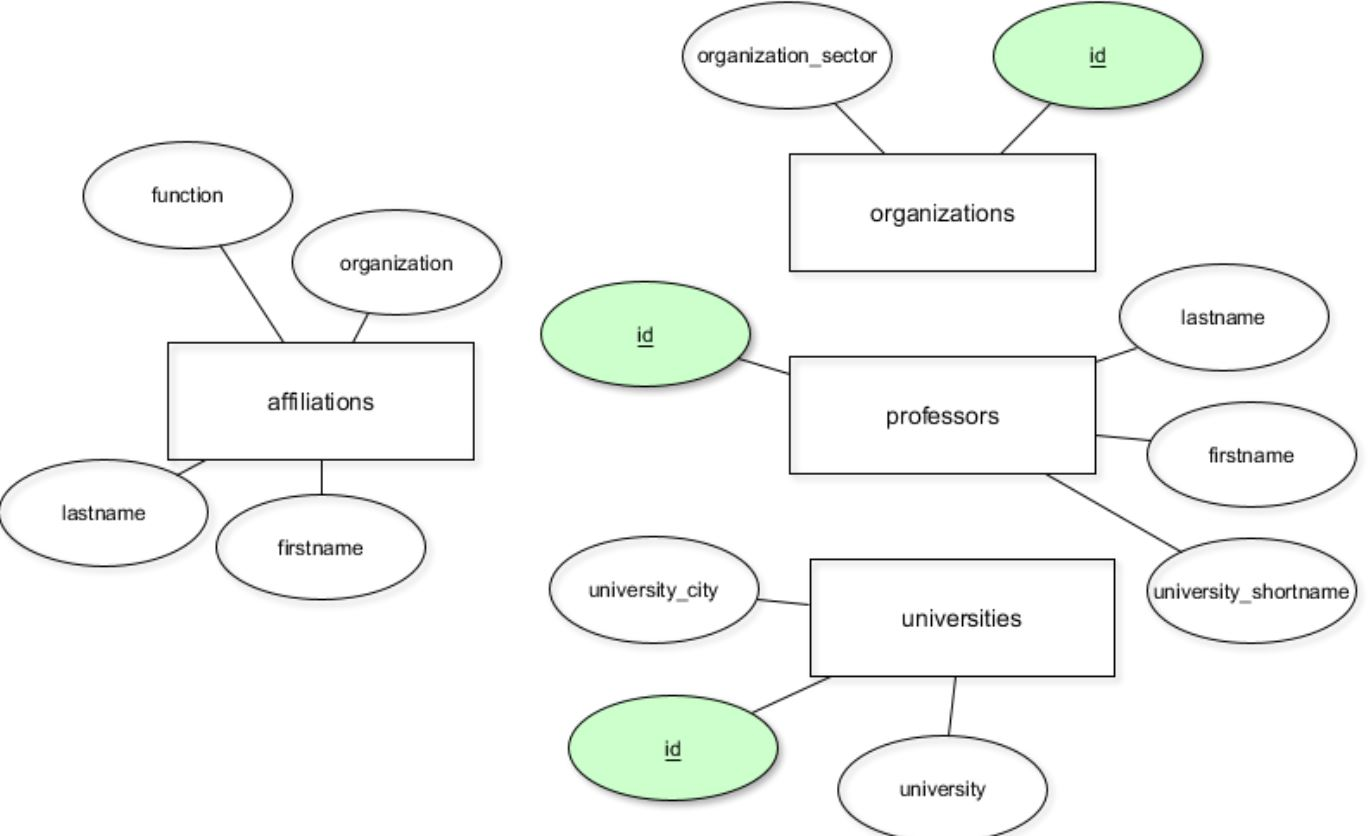

In [7]:
### Look back the following picture; the green_block is the PRIMARY KEYs and we will discuss this again in Section 3.

### EXERCISEs

#### Exercise 2.1. Identify the primary key
Have a look at the example table from the previous section. As the `database designer`, you have to make a `wise choice` as to which column should be the `primary key`.

                             license_no     | serial_no |    make    |  model  | year
                        --------------------+-----------+------------+---------+------
                         Texas ABC-739      | A69352    | Ford       | Mustang |    2
                         Florida TVP-347    | B43696    | Oldsmobile | Cutlass |    5
                         New York MPO-22    | X83554    | Oldsmobile | Delta   |    1
                         California 432-TFY | C43742    | Mercedes   | 190-D   |   99
                         California RSK-629 | Y82935    | Toyota     | Camry   |    4
                         Texas RSK-629      | U028365   | Jaguar     | XJS     |    4
Which of the following **column or column combinations could best serve as primary key (PK)**?

        A. PK = {make}                                                C. PK = {license_no}
        B. PK = {model, year}                                         D. PK = {year, make}

            ==================================================================
                                    ANSWER & COMMENT
            ==================================================================
*A. Wrong option!* A `primary key` consisting only of `"make"` wouldn't make much sense, since there are duplicate values (`Oldsmobile`) in that column.

*B. Incorrect answer!!* While the combination of `"model"` and `"year"` is `indeed unique`, it is ***not a candidate key***. It is a **superkey** because `"year"` **could be removed** and the `key` **would still contain only unique values**. Only `candidate keys` should be turned into `primary keys`.

**C. Correctly!** A `primary key` consisting solely of `"license_no"` is probably the wisest choice, as license numbers are **`certainly unique`** across all registered cars in a `country`.

*D. Wrong option!* The combination of `"make"` and `"year"` is a `candidate key`, as **no attributes can be removed without losing the uniqueness requirement**. However, it is `plausible` that ***duplicate values theoretically exist***, e.g. another `"Jaguar"` from the year `"4"`. Therefore, this combination is ***not really suited as the primary key***.

#### Exercise 2.2. ADD key CONSTRAINTs to the tables
Two of the tables in your database already have `well-suited candidate keys` consisting of one column each: `organizations` and `universities` with the `organization` and `university_shortname` columns, respectively.

In this exercise, you'll rename these columns to id using the **`RENAME COLUMN`** command and then specify `primary key constraints` for them. This is as straightforward as adding `unique constraints` (see the last exercise of [Chapter 2](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course1:%20Introduction%20to%20Relational%20Databases%20in%20SQL/enforce-data-consistency-with-attribute-constraint.ipynb)):

                        ALTER TABLE table_name
                        ADD CONSTRAINT some_name PRIMARY KEY (column_name)
Note that you can also specify more than one column in the brackets.

#### Instructions
**Step 1.** Rename the `organization` column to `id` in `organizations`. Make id a `primary key` and name it `organization_pk`.

**SOLUTION.**

                        -- Rename the organization column to id
                        ALTER TABLE organizations
                        RENAME COLUMN organization TO id;

                        -- Make id a primary key
                        ALTER TABLE organizations
                        ADD CONSTRAINT organization_pk PRIMARY KEY (id);

**Step 2.** Rename the `university_shortname` column to `id` in `universities`. Then make `id` a `primary key` and name it `university_pk`.

**SOLUTION.**

                    -- Rename the university_shortname column to id
                    ALTER TABLE universities
                    RENAME COLUMN university_shortname TO id;

                    -- Make id a primary key
                    ALTER TABLE universities
                    ADD CONSTRAINT university_pk PRIMARY KEY (id)

That was easy, wasn't it? Let's tackle the last table that needs a `primary key` right now: `professors`. However, things are going to be different this time, because you'll add a so-called `surrogate key`.

## 3. Surrogate keys

**Some notes on `SURROGATE KEY`**

> `Primary key` should be built from as few columns as possible
> 
> `Primary key` should never change over time.

**Example.** The following table named `cars`,

                             license_no     | serial_no |    make    |  model  | color
                        --------------------+-----------+------------+---------+-----------
                         Texas ABC-739      | A69352    | Ford       | Mustang | blue
                         Florida TVP-347    | B43696    | Oldsmobile | Cutlass | black
                         New York MPO-22    | X83554    | Oldsmobile | Delta   | silver
                         California 432-TFY | C43742    | Mercedes   | 190-D   | champange
                         California RSK-629 | Y82935    | Toyota     | Camry   | black
                         Texas RSK-629      | U028365   | Jaguar     | XJS     | blue
And the `surrogate keys` here is the combination of 3 columns `"make", "model", "color"`

#### Adding a surrogate key with the serial data-type!

For example, we will add a new observation (new row) to the `surrogate key` in the table `cars` with the `serial` data-type by the following:

**Step 1.** Add the column `id` with `serial data_type` to the table `car`
                
                ALTER TABLE cars
                ADD COLUMN id serial PRIMARY KEY;
**Step 2.** Add the new values

                INSERT INTO cars
                VALUES ('Volkswagen', 'Blitz', 'Black')
Then the `query result` will be

                        |    make    |  model  | color     |  id |
                        |------------+---------+-----------|-----|
                        | Ford       | Mustang | blue      |  1  |
                        | Oldsmobile | Cutlass | black     |  2  |
                        | Oldsmobile | Delta   | silver    |  3  |
                        | Mercedes   | 190-D   | champange |  4  |
                        | Toyota     | Camry   | black     |  5  |
                        | Jaguar     | XJS     | blue      |  6  |
                        | Volkswagen | Blitz   | black     |  7  |

                

But **dont't duplicate the serial value when adding a `surrogate key`**. For example,

                INSERT INTO cars
                VALUES ('Ospel', 'Astra', 'green', 1)
                    
then the `error_message` will be appear as follow:

            duplicate keys values violates unnique constraint "id_pkey"
            DETAIL : Key (id)=(1) already exists
**ANOTHER TYPE OF SURROGATE KEYs**

                ALTER TABLE table_name
                ADD COLUMN column_c varchar(256);
                
                UPDATE table_name
                SET column_c = CONCAT(column_a, column_b);
                
                ALTER TABLE table_name
                ADD CONSTRAINT pk PRIMARY KEY (column_c);

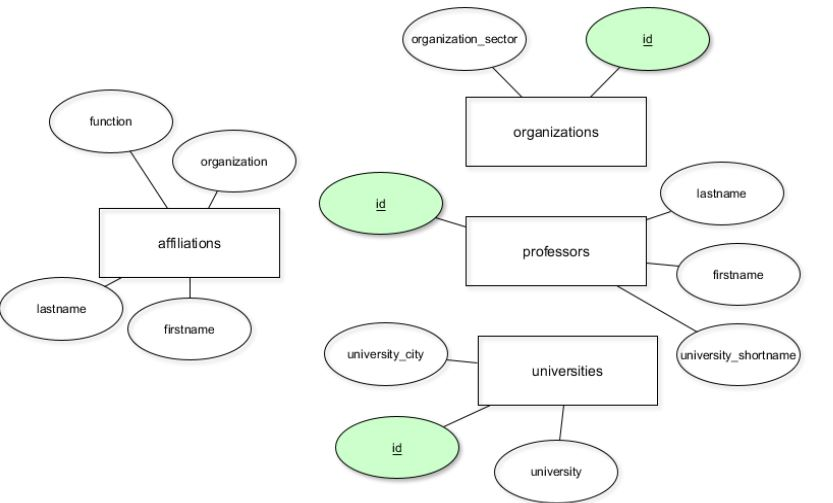

In [8]:
### Look back the following picture

### EXERCISEs
#### Exercise 3.1. Add a SERIAL surrogate key
Since there's no single column candidate key in `professors` (only a composite key candidate consisting of `firstname`, `lastname`), you'll add a new column id to that table.

This column has a special data type serial, which turns the column into an `auto-incrementing number`. This means that, whenever you add a new `professor` to the table, it will automatically get an id that does not exist yet in the table: a perfect `primary key`!

#### Instructions
**Step 1.** Add a new column id with data type `serial` to the `professors` table.

**SOLUTION.**

                        -- Add the new column to the table
                        ALTER TABLE professors
                        ADD COLUMN id serial;
**Step 2.** Make `id` a `primary key` and name it `professors_pkey`.

**SOLUTION.**

                        -- Add the new column to the table
                        ALTER TABLE professors 
                        ADD COLUMN id serial;

                        -- Make id a primary key
                        ALTER TABLE professors 
                        ADD CONSTRAINT professors_pkey PRIMARY KEY (id);

**Step 3.** Write a `query` that returns all the columns and 10 rows from `professors`.

**SOLUTION.**

        -- Add the new column to the table
        ALTER TABLE professors 
        ADD COLUMN id serial;

        -- Make id a primary key
        ALTER TABLE professors 
        ADD CONSTRAINT professors_pkey PRIMARY KEY (id);

        -- Have a look at the first 10 rows of professors
        SELECT *
        FROM professors
        LIMIT 10
**query result**

|firstname|lastname|university_shortname|id |
|---------|--------|--------------------|---|
|Karl|Aberer|EPF|1
|Reza Shokrollah|Abhari|ETH|2
|Georges|Abou Jaoudé|EPF|3
|Hugues|Abriel|UBE|4
|Daniel|Aebersold|UBE|5
|Marcelo|Aebi|ULA|6
|Christoph|Aebi|UBE|7
|Patrick|Aebischer|EPF|8
|Stephan|Aier|USG|9
|Anastasia|Ailamaki|EPF|10

Well done. As you can see, `PostgreSQL` has automatically numbered the rows with the `id` column, which now functions as a `(surrogate) primary key` – it uniquely identifies `professors`.

#### Exercise 3.2. CONCATenate columns to a surrogate key
Another strategy to add a surrogate key to an existing table is to concatenate existing columns with the **`CONCAT()`** function.

Let's think of the following example table:

                    CREATE TABLE cars (
                     make varchar(64) NOT NULL,
                     model varchar(64) NOT NULL,
                     mpg integer NOT NULL
                    )
The table is populated with **10 rows of completely fictional data**.

Unfortunately, the table doesn't have a `primary key` yet. None of the columns consists of only unique values, so some columns can be combined to form a key.

In the course of the following exercises, you will combine `make` and `model` into such a surrogate key.

#### Instruction
**Step 1.** Count the number of distinct rows with a combination of the `make` and `model` columns.
**SOLUTION.**

                    -- Count the number of distinct rows with columns make, model
                    SELECT COUNT(DISTINCT(make, model)) 
                    FROM cars;

**Step 2.** Add a new column `id` with the data type `varchar(128)`.

**SOLUTION.**

                    -- Count the number of distinct rows with columns make, model
                    SELECT COUNT(DISTINCT(make, model)) 
                    FROM cars;

                    -- Add the id column
                    ALTER TABLE cars
                    ADD COLUMN id varchar(128);
                    
**Step 3.** Concatenate `make` and `model` into `id` using an `UPDATE table_name SET column_name = ...` query and the `CONCAT()` function.

**SOLUTION.**

                    -- Count the number of distinct rows with columns make, model
                    SELECT COUNT(DISTINCT(make, model)) 
                    FROM cars;

                    -- Add the id column
                    ALTER TABLE cars
                    ADD COLUMN id varchar(128);

                    -- Update id with make + model
                    UPDATE cars
                    SET id = CONCAT(make, model);

**Step 4.** Make `id` a `primary key` and name it `id_pk`.

**SOLUTION.**

                    -- Count the number of distinct rows with columns make, model
                    SELECT COUNT(DISTINCT(make, model)) 
                    FROM cars;

                    -- Add the id column
                    ALTER TABLE cars
                    ADD COLUMN id varchar(128);

                    -- Update id with make + model
                    UPDATE cars
                    SET id = CONCAT(make, model);

                    -- Make id a primary key
                    ALTER TABLE cars
                    ADD CONSTRAINT id_pk PRIMARY KEY(id);

                    -- Have a look at the table
                    SELECT * FROM cars;

**query result.**

| make | model | mpg | id |
|------|-------|-----|----| 
| Subaru|Forester|24|SubaruForester
| Opel|Astra|45|OpelAstra
| Opel|Vectra|40|OpelVectra
| Ford|Avenger|30|FordAvenger
| Ford|Galaxy|30|FordGalaxy
| Toyota|Prius|50|ToyotaPrius
| Toyota|Speedster|30|ToyotaSpeedster
| Toyota|Galaxy|20|ToyotaGalaxy
| Mitsubishi|Forester|10|MitsubishiForester
| Mitsubishi|Galaxy|30|MitsubishiGalaxy


#### Exercise 3.3. Test your knowledge before advancing
Before you move on to the next chapter, let's quickly review what you've learned so far about attributes and key constraints. If you're unsure about the answer, please quickly review chapters 2 and 3, respectively.

Let's think of an entity type `"student"`. A student has:

> a last name consisting of up to 128 characters (this cannot contain a missing value),
>
> a unique social security number of length 9, consisting only of integers,
>
> a phone number of fixed length 12, consisting of numbers and characters (but some students don't have one).
#### Instructions
Given the above description of a student entity, create a table `students` with the correct column types.

Add a **`PRIMARY KEY`** for the social security number `ssn`.

Note that there is no formal length requirement for the integer column. The application would have to make sure it's a correct SSN!

**SOLUTION.**

                    -- Create the table
                    CREATE TABLE students (
                                              last_name varchar(128) NOT NULL,
                                              ssn integer PRIMARY KEY,
                                              phone_no char(12)
                                            );
